In [1]:
import pandas as pd
import numpy as np
import shmapy

In [2]:
states = pd.DataFrame(pd.read_csv('../static/demo_input1.csv')['state'])
states['values'] = np.random.random(states.shape[0])
states.head()

,state,values
0,AK,0.251698
1,AL,0.437367
2,AR,0.562897
3,AZ,0.237578
4,CA,0.465260


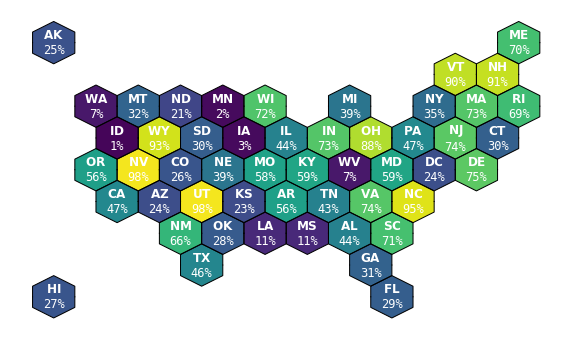

In [3]:
shmapy.us_plot_hex(
    states, 
    chart_type='choropleth', 
    numeric_labels='all',
    line_color='black',
    figsize=(10,6),
    size=12
)

In [4]:
states['category'] = np.random.choice(['Apple', 'Cherry' ,'Banana', 'Durian'], states.shape[0])
states.head()
states['values_label'] = np.round(states['values']*100).astype(int).astype(str) + '%'
states.head()

,state,values,category,values_label
0,AK,0.251698,Banana,25%
1,AL,0.437367,Banana,44%
2,AR,0.562897,Durian,56%
3,AZ,0.237578,Cherry,24%
4,CA,0.465260,Cherry,47%


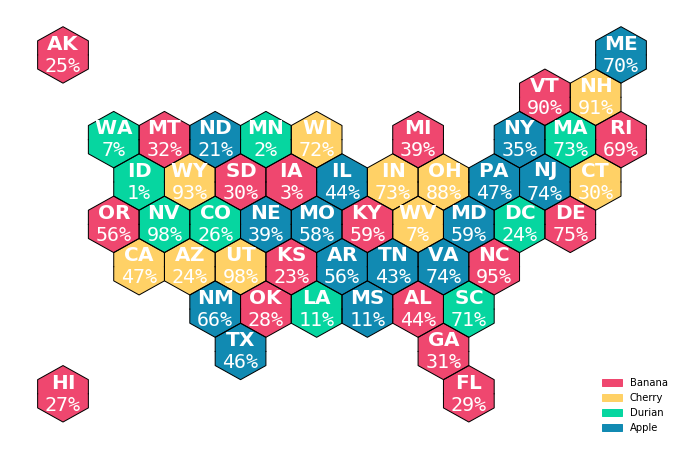

In [5]:
shmapy.us_plot_hex(
    states[['state', 'category', 'values_label']], 
    size = 20, 
    chart_type='categorical', 
    line_color='black', 
    numeric_labels_custom='values_label',
    figsize=(12, 8)
)